# Exploratory Data Analysis - United States Retail Services 

# Import Libraries 

In [110]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [116]:
df = pd.read_csv('E:\SampleSuperstore.csv')

ParserError: Error tokenizing data. C error: out of memory

In [91]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [56]:
df.shape

(9994, 10)

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Cleaning the data

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [14]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


# Drop unwanted columns

In [92]:
df.drop(['Ship Mode','Segment','Postal Code'],axis=1,inplace = True)

In [93]:
df.head(2)

,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820


# Relationship Analysis 

In [29]:
corelation = df.corr()

# Heat Map

<AxesSubplot:>

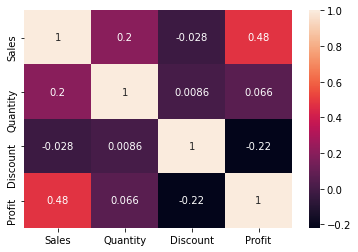

In [30]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels = corelation.columns, annot = True)

# Pair Plot

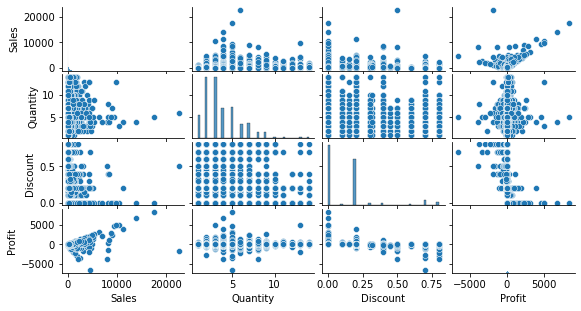

In [85]:
sns.pairplot(df).fig.set_size_inches(8,4)

In [33]:
df.head()

,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [37]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# Relation Plot

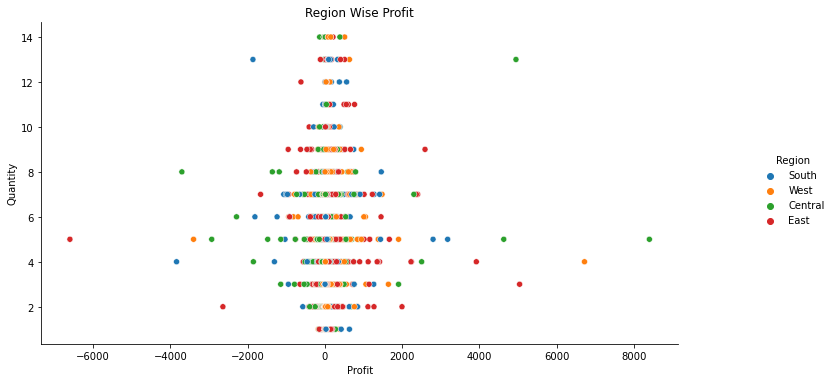

In [77]:
sns.relplot(x= 'Profit',y= 'Quantity',hue = 'Region',data=df).set(title='Region Wise Profit').fig.set_size_inches(12,5)

# Distibution Plot

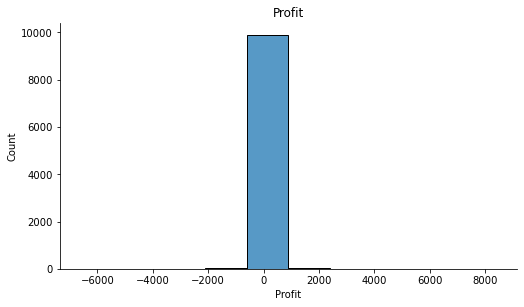

In [84]:
sns.displot(df['Profit'], bins = 10).set(title="Profit").fig.set_size_inches(8,4)

In [ ]:
sns.countplot(x='Sales',hue ='Category',data=df)

# Histogram

<AxesSubplot:ylabel='Frequency'>

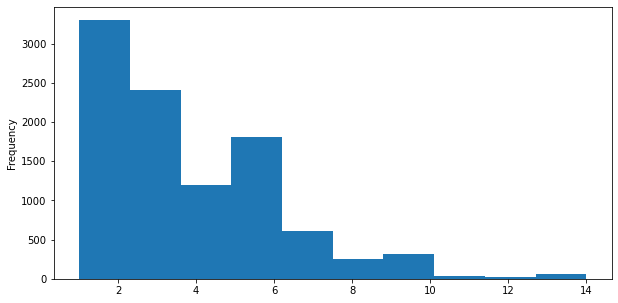

In [101]:
df['Quantity'].plot.hist(bins=10,figsize=(10,5))

# Category Plot

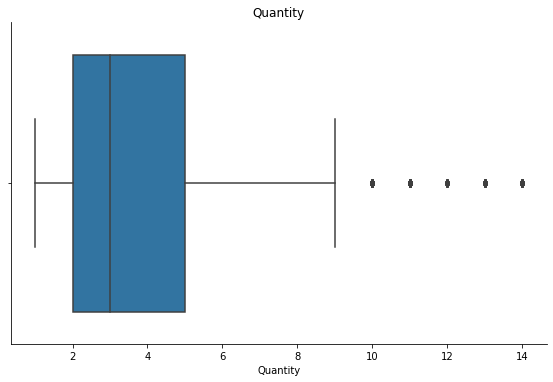

In [87]:
sns.catplot(x='Quantity',kind = 'box', data =df).set(title= 'Quantity').fig.set_size_inches(8,5)
                                                                                

# End